In [1]:
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import pandasql as ps
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

py.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('data/train-data.csv', encoding = 'utf-8')

# Correlation between features and labels

In [4]:
df2 = df[['age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 
           'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 
           'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 
           'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 
           'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA',
           'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 
           'is_top500', 'age_first_milestone_year','age_last_milestone_year','labels'
           ]]
df2_corr_pd = df2.corr()
print(df2_corr_pd['labels'].sort_values(ascending=False))

labels                      1.000000
relationships               0.365463
milestones                  0.353241
is_top500                   0.308301
age_last_milestone_year     0.259787
funding_rounds              0.220262
has_roundB                  0.215823
has_roundA                  0.195157
avg_participants            0.184372
has_roundC                  0.171145
age_first_milestone_year    0.150907
has_roundD                  0.126663
is_enterprise               0.090521
is_CA                       0.089539
age_last_funding_year       0.077255
is_MA                       0.073162
is_advertising              0.066997
is_NY                       0.054076
funding_total_usd           0.042108
is_software                 0.020739
is_mobile                  -0.001868
is_web                     -0.014396
is_consulting              -0.018066
is_biotech                 -0.027503
is_othercategory           -0.033806
has_VC                     -0.036943
is_gamesvideo              -0.039876
i

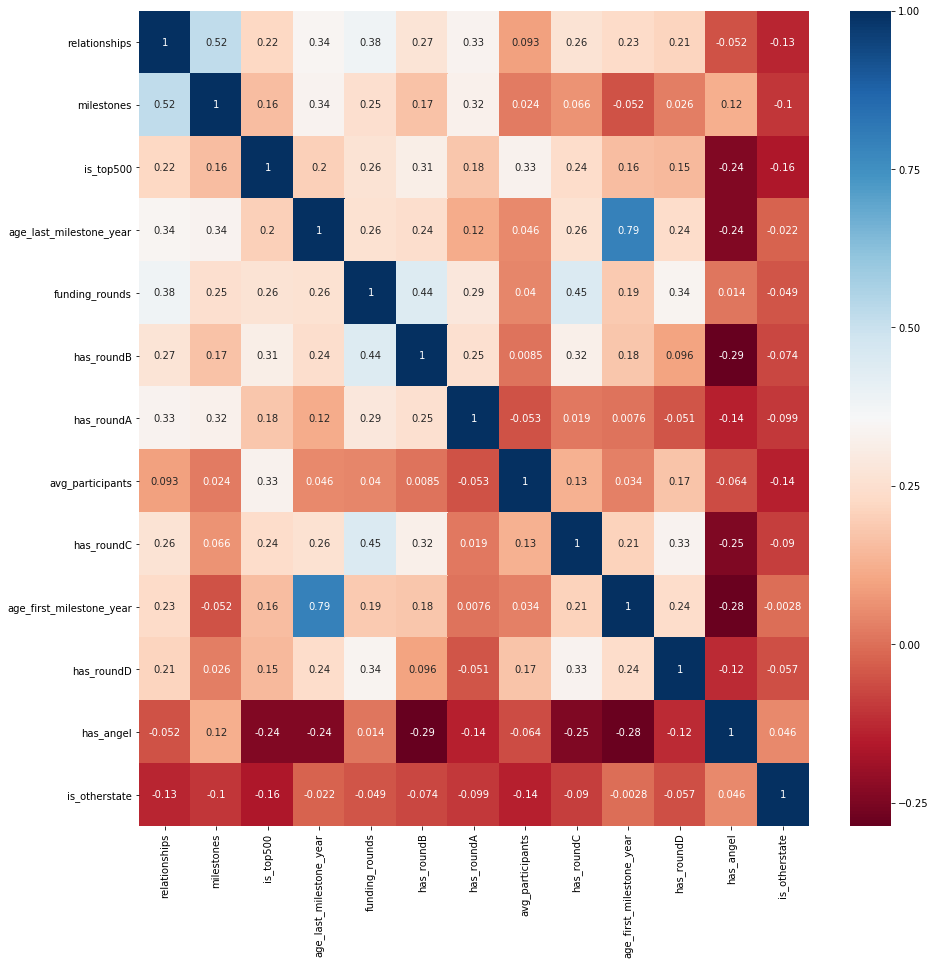

In [134]:
features = ['relationships','milestones','is_top500','age_last_milestone_year','funding_rounds','has_roundB','has_roundA','avg_participants','has_roundC','age_first_milestone_year','has_roundD', 'has_angel', 'is_otherstate']

plt.figure(figsize = (15,15))
sn.heatmap(df[features].corr(), annot = True, cmap = plt.cm.RdBu)
plt.show()

In [9]:
q1 = ''' 
        select rel_group, 
               status, 
               count(*) as cnt 
        from (
        select relationships,
               case when relationships = 0 then "0"
               when relationships between 1 and 3 then "1-3" 
               when relationships between 4 and 6 then "4-6"
               when relationships between 7 and 10 then "7-10" 
               else "10+" end as rel_group,
               status
        from df
        ) dt1
        group by 1,2
        order by 1

'''

rel_df = ps.sqldf(q1, locals())
rel_df

,rel_group,status,cnt
0,0,acquired,3
1,0,closed,47
2,1-3,acquired,118
3,1-3,closed,187
4,10+,acquired,236
5,10+,closed,28
6,4-6,acquired,227
7,4-6,closed,101
8,7-10,acquired,162
9,7-10,closed,45


In [10]:
label = np.concatenate([rel_df['rel_group'].unique(), rel_df['status'].unique()])
color = ["rgba(31, 119, 180, 0.8)", "rgba(255, 127, 14, 0.8)", "rgba(148, 103, 189, 0.8)", "rgba(140, 86, 75, 0.8)",
         "rgba(227, 119, 194, 0.8)", "rgba(44, 160, 44, 0.8)", "rgba(214, 39, 40, 0.8)"]

source = []
target = []
value = []

for i in range(len(label[:5])):
    for j in range(5, len(label)):
        source.append(i)
        if label[j] == 'acquired':
            target.append(5)
        else:
            target.append(6)
        value.append(rel_df[(rel_df['rel_group']==label[i]) & (rel_df['status'] == label[j])]['cnt'].values[0])

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      label = label,
      color = color
    ),
    link = dict(
        source = source,
        target = target,
        value = value
  ))

layout =  dict(
    title = "Link between number of relationships and company success/failure",
    font = dict(
      size = 10
    )
)
chmap = go.Figure(data = [data], layout = layout)
py.offline.iplot(chmap)

In [114]:
q2 = '''
        select milestones_group, 
               status, 
               count(*) as cnt
        from (
        select milestones,
               case when milestones = 0 then "0"
               when milestones between 1 and 2 then "1-2" 
               when milestones between 3 and 5 then "3-5"
               else "5+" end as milestones_group,
               status
        from df
        ) dt1
        group by 1,2
        order by 1
'''

milestones_df = ps.sqldf(q2, locals())
milestones_df

,milestones_group,status,cnt
0,0,acquired,56
1,0,closed,139
2,1-2,acquired,415
3,1-2,closed,212
4,3-5,acquired,267
5,3-5,closed,56
6,5+,acquired,8
7,5+,closed,1


In [121]:
label = np.concatenate([milestones_df['milestones_group'].unique(), milestones_df['status'].unique()])
color = ["rgba(31, 119, 180, 0.8)", "rgba(255, 127, 14, 0.8)", "rgba(148, 103, 189, 0.8)", "rgba(140, 86, 75, 0.8)",
         "rgba(227, 119, 194, 0.8)", "rgba(44, 160, 44, 0.8)", "rgba(214, 39, 40, 0.8)"]

source = []
target = []
value = []

for i in range(len(label[:4])):
    for j in range(4, len(label)):
        source.append(i)
        if label[j] == 'acquired':
            target.append(4)
        else:
            target.append(5)
        value.append(milestones_df[(milestones_df['milestones_group']==label[i]) & (milestones_df['status'] == label[j])]['cnt'].values[0])

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      label = label,
      color = color
    ),
    link = dict(
        source = source,
        target = target,
        value = value
  ))

layout =  dict(
    title = "Link between number of milestones and company success/failure",
    font = dict(
      size = 10
    )
)
chmap = go.Figure(data = [data], layout = layout)
py.offline.iplot(chmap)

In [10]:
df.to_csv('data/output.csv', encoding = 'utf-8')

In [11]:
df2 = pd.read_csv('data/funding-data.csv', encoding = 'utf-8')


In [15]:
price_amount = df2['price_amount'].values
funding_total = df2['funding_total_usd'].values

In [25]:
trace = go.Scatter(x = funding_total,
                   y = price_amount,
                   mode = "markers",
                   marker = dict(size = 12, color = "rgba(0, 0, 255, 0.9)"))
data = [trace]

layout = {"title": "Correlation between total funding and price acquired",
          "xaxis": {"title": "Total funding", "zeroline": False},
          "yaxis": {"title": "Price acquired", "zeroline": False},}

py.offline.iplot({"data": data, "layout": layout})